#### Environment

In [ ]:
# In conda env 
conda create -n dmd2 python=3.8 -y 
conda activate dmd2 

pip install --upgrade anyio
pip install -r requirements.txt
python setup.py  develop

#### 4-step UNet generation

In [2]:
import torch
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "tianweiy/DMD2"
ckpt_name = "dmd2_sdxl_4step_unet_fp16.bin"
# Load model.
unet = UNet2DConditionModel.from_config(base_model_id, subfolder="unet").to("cuda", torch.float16)
# unet.load_state_dict(torch.load(hf_hub_download(repo_name, ckpt_name), map_location="cuda"))
# local path
unet.load_state_dict(torch.load('/home/yiming/pretrained_model/DMD2/' + ckpt_name, map_location="cuda"))
pipe = DiffusionPipeline.from_pretrained(base_model_id, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
prompt="a photo of a cat"

# LCMScheduler's default timesteps are different from the one we used for training 
image=pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0, timesteps=[999, 749, 499, 249]).images[0]

/home/yiming/anaconda3/envs/dmd2/lib/python3.8/site-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]
The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
The custom timestep schedule contains the following timesteps which are not on the original training/di

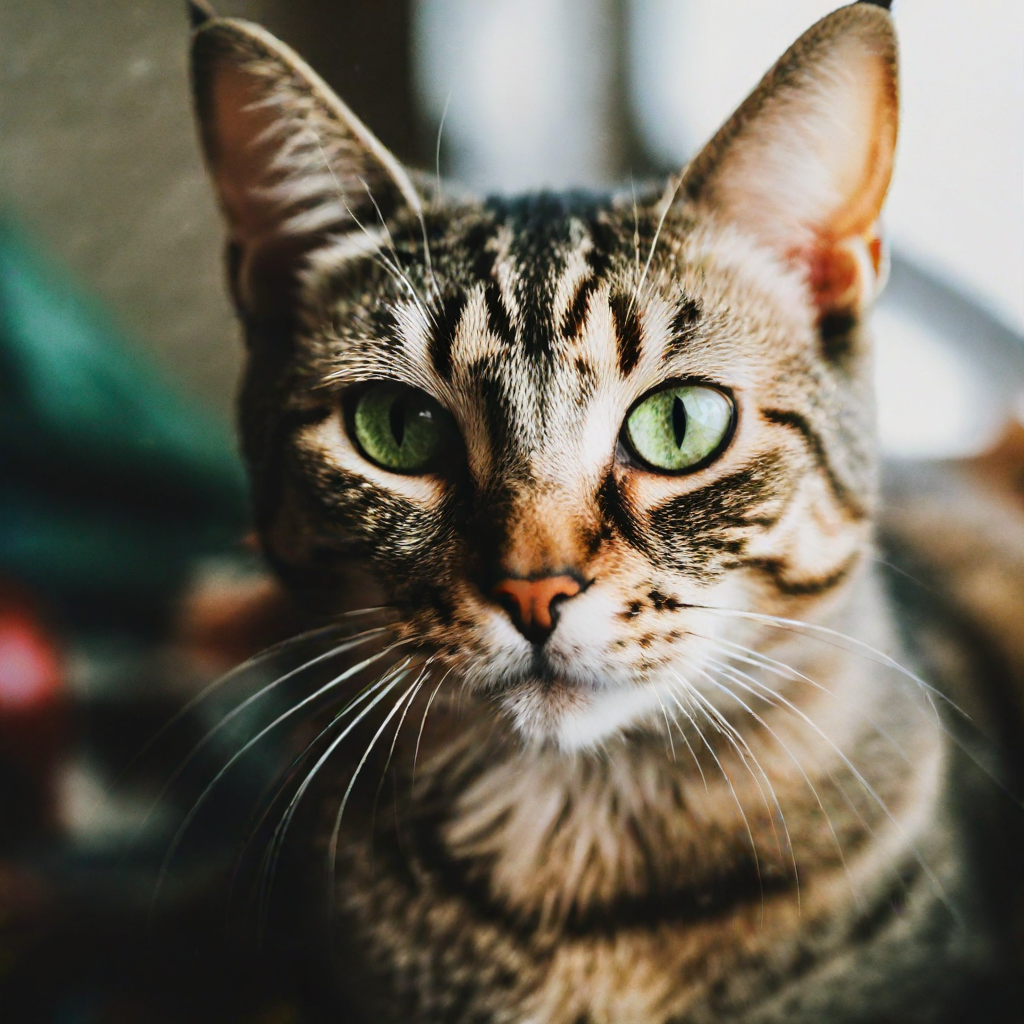

In [3]:
image

#### 4-step LoRA generation

In [ ]:
import torch
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "tianweiy/DMD2"
ckpt_name = "dmd2_sdxl_4step_lora_fp16.safetensors"
# Load model.
pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe.load_lora_weights(hf_hub_download(repo_name, ckpt_name))
pipe.fuse_lora(lora_scale=1.0)  # we might want to make the scale smaller for community models

pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
prompt="a photo of a cat"

# LCMScheduler's default timesteps are different from the one we used for training 
image=pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0, timesteps=[999, 749, 499, 249]).images[0]

#### 1-step UNet generation

In [ ]:
import torch
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "tianweiy/DMD2"
ckpt_name = "dmd2_sdxl_1step_unet_fp16.bin"
# Load model.
unet = UNet2DConditionModel.from_config(base_model_id, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(torch.load(hf_hub_download(repo_name, ckpt_name), map_location="cuda"))
pipe = DiffusionPipeline.from_pretrained(base_model_id, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
prompt="a photo of a cat"
image=pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0, timesteps=[399]).images[0]